In [64]:
import requests
page = requests.get("https://www.worldometers.info/coronavirus")

In [65]:
page.status_code

200

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live Update: 162,891,712 Cases and 3,376,579 Deaths from the Coronavirus - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-to
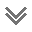

In [66]:
page.content

In [67]:
from bs4 import BeautifulSoup

In [68]:
#Instatiating the BeautifulSoup Class
soup = BeautifulSoup(page.content, 'lxml')
#Where soup is a variable containing the HTML of the webpage

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   COVID Live Update: 162,891,712 Cases and 3,376,579 Deaths from the Coronavirus - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link hr
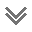

In [69]:
#Lets formatt it nicely, using the prettify method as contrasts as cell 3
print(soup.prettify())

In [70]:
# Search for the table and extracting it
table = soup.find('table', attrs={'id': 'main_table_countries_today'})

In [71]:
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width

In [72]:
rows = table.find_all("tr", attrs={"style": ""})

In [73]:
data = []
for i,item in enumerate(rows):
    
    if i == 0:
        
        data.append(item.text.strip().split("\n")[:17])
        
    else:
        data.append(item.text.strip().split("\n")[:16])

In [74]:
data

[['#',
  'Country,Other',
  'TotalCases',
  'NewCases',
  'TotalDeaths',
  'NewDeaths',
  'TotalRecovered',
  'NewRecovered',
  'ActiveCases',
  'Serious,Critical',
  'Tot\xa0Cases/1M pop',
  'Deaths/1M pop',
  'TotalTests',
  'Tests/',
  '1M pop',
  '',
  'Population'],
 ['World',
  '162,891,712',
  '+358,941',
  '3,376,579',
  '+5,477',
  '141,890,830',
  '+433,766',
  '17,624,303',
  '103,420',
  '20,897',
  '433.2',
  '',
  '',
  '',
  'All'],
 ['1',
  'USA',
  '33,671,081',
  '+2,150',
  '599,341 ',
  '+27',
  '26,713,260',
  '+439',
  '6,358,480',
  '8,343',
  '101,210',
  '1,802',
  '464,116,423',
  '1,395,060',
  '332,685,557 ',
  'North America'],
 ['2',
  'India',
  '24,608,001',
  '+235,758',
  '268,521 ',
  '+2,292',
  '20,679,456',
  '+253,133',
  '3,660,024',
  '8,944',
  '17,681',
  '193',
  '313,017,193',
  '224,909',
  '1,391,753,322 ',
  'Asia'],
 ['3',
  'Brazil',
  '15,521,313',
  '',
  '432,785 ',
  '',
  '14,028,355',
  '',
  '1,060,173',
  '8,318',
  '72,574',
  

In [75]:
import pandas as pd
import dask.dataframe as dd

dt = pd.DataFrame(data)
dt = pd.DataFrame(data[1:], columns=data[0][:16]) #Formatting the header
df = dd.from_pandas(dt,npartitions=1)

In [76]:
df.head(10)

# Country,Other  TotalCases   NewCases TotalDeaths    NewDeaths  \
0  World   162,891,712    +358,941  3,376,579      +5,477  141,890,830   
1      1           USA  33,671,081     +2,150    599,341           +27   
2      2         India  24,608,001   +235,758    268,521        +2,292   
3      3        Brazil  15,521,313               432,785                 
4      4        France   5,848,154               107,423                 
5      5        Turkey   5,095,390                44,301                 
6      6        Russia   4,931,691     +8,790    115,480          +364   
7      7            UK   4,448,851     +2,027    127,675            +7   
8      8         Italy   4,153,374     +6,659    124,063          +136   
9      9         Spain   3,604,799                79,339                 

  TotalRecovered NewRecovered ActiveCases Serious,Critical Tot Cases/1M pop  \
0       +433,766   17,624,303     103,420           20,897            433.2   
1     26,713,260         +439   6,358,480            8,343          101,210   
2     20,679,456     +253,133   3,660,024            8,944           17,681   
3     14,028,355                1,060,173            8,318           72,574   
4      5,042,411                  698,320            4,352           89,423   
5      4,894,024                  157,065            2,670           59,858   
6      4,547,500       +9,866     268,711            2,300           33,781   
7      4,275,502       +2,061      45,674              129           65,237   
8      3,696,481      +13,292     332,830            1,805           68,782   
9      3,297,340                  228,120            1,899           77,074   

  Deaths/1M pop   TotalTests     Tests/          1M pop                 
0                                                   All           None  
1         1,802  464,116,423  1,395,060    332,685,557   North America  
2           193  313,017,193    224,909  1,391,753,322            Asia  
3         2,024   46,970,130    219,621    213,868,974   South America  
4         1,643   80,698,552  1,233,944     65,398,877          Europe  
5           520   50,463,016    592,813     85,124,706            Asia  
6           791  133,100,000    911,714    145,988,804          Europe  
7         1,872  169,007,195  2,478,284     68,195,259          Europe  
8         2,055   62,700,094  1,038,346     60,384,578          Europe  
9         1,696   47,213,067  1,009,462     46,770,505          Europe

In [77]:
df.to_csv('../Desktop/15_May_data-*.csv')

['C:/Users/iUsaid/Desktop/15_May_data-0.csv']